# Analysis of behavioral data from fMRI Iowa Gambling Task 2

In [2]:
import os 
import re
import pandas as pd
import numpy as np
import pip
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = '../in/merged_logfile_145_B.csv' # the direction 

# List all files in the directory
df = pd.read_csv(file_path)

In [14]:
df

,frames_before_decks,init_mark,dur_win,deck_select,rt_select,frames_after_decks,n_moves,no,ID,win,...,offset_decks,dur_measured_decks,loss,exp_type,t_moves,t_select,total,session,condition,onset_win
0,72,0,240,4,1.915792,48,3,1,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']","[1.4668897000083234, 2.183861600002274, 2.5676...",2.917697,50,1,iowa_exp,3.317445
1,72,2,240,3,0.807522,48,0,2,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']",[],6.752394,100,1,iowa_exp,7.152265
2,72,0,240,4,1.308924,48,3,3,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']","[10.245393500008504, 10.570572299999185, 10.83...",11.096858,150,1,iowa_exp,11.503944
3,72,0,240,3,1.382723,48,2,4,NaN,50,...,NaN,NaN,-50,"['fMRI', 'EEG', 'MEG']","[14.3553130000073, 15.188970200004405]",15.489050,150,1,iowa_exp,15.888997
4,72,3,240,3,0.832592,48,3,5,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']","[18.081858000005013, 18.80703710000671, 19.048...",19.357279,200,1,iowa_exp,19.757180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,72,2,240,4,0.699871,48,1,36,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']",[141.63545989998966],141.936275,500,3,iowa_exp,142.335562
156,72,3,240,4,0.632521,48,0,37,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']",[],145.612067,550,3,iowa_exp,146.012007
157,72,0,240,3,0.916028,48,2,38,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']","[149.06375089999347, 149.33014489999914]",149.580411,600,3,iowa_exp,149.980177
158,72,0,240,4,1.274391,48,3,39,NaN,50,...,NaN,NaN,0,"['fMRI', 'EEG', 'MEG']","[153.0316582999949, 153.2984027999919, 153.615...",153.890259,650,3,iowa_exp,154.290207


In [15]:
results = []

In [16]:
# Loop through each session, calculating switches and trials
for session, group in df.groupby(['session']):
    # Calculate the number of trials in the session
    trials = len(group)
    
    # Calculate the number of switches (change in deck_select between consecutive trials)
    switches = (group['deck_select'] != group['deck_select'].shift()).sum() - 1  # Exclude the first trial
    
    # Calculate the switch frequency as switches/trials
    switch_frequency = switches / trials
    
    # Append the results to the list
    results.append({
        'session': session,
        'trials': trials,
        'switches': switches,
        'switch_frequency': switch_frequency
    })

# Create a new DataFrame with the calculated data
switch_df = pd.DataFrame(results)


In [17]:
switch_df

,session,trials,switches,switch_frequency
0,"(1,)",40,20,0.500
1,"(2,)",40,23,0.575
2,"(3,)",40,15,0.375
3,"(4,)",40,20,0.500


In [18]:
switch_df.to_csv("../in/switch_df_B.csv",index=False)

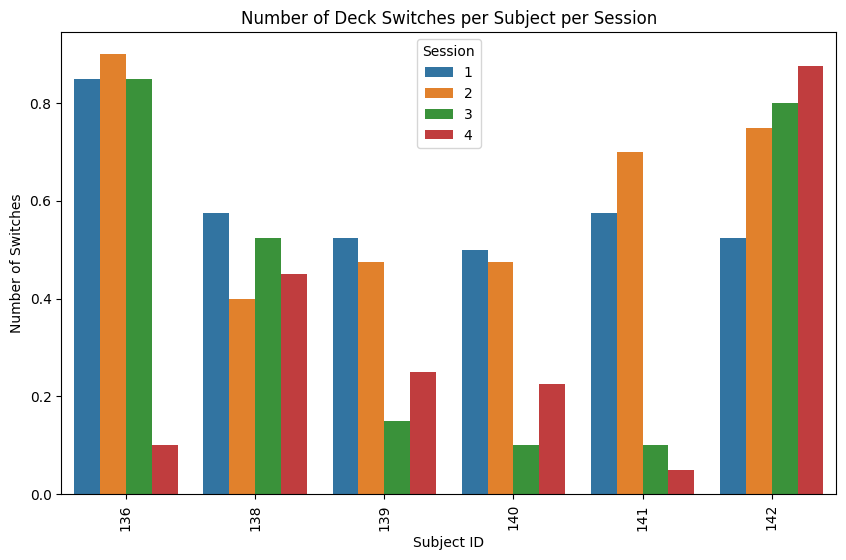

In [26]:
# Plotting the number of switches per subject per session using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create a barplot showing the number of switches per session for each subject
sns.barplot(x='subject_id', y='switch_frequency', hue='session', data=switch_df)

# Set labels and title
plt.title('Number of Deck Switches per Subject per Session')
plt.xlabel('Subject ID')
plt.ylabel('Number of Switches')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Session')

plt.show()

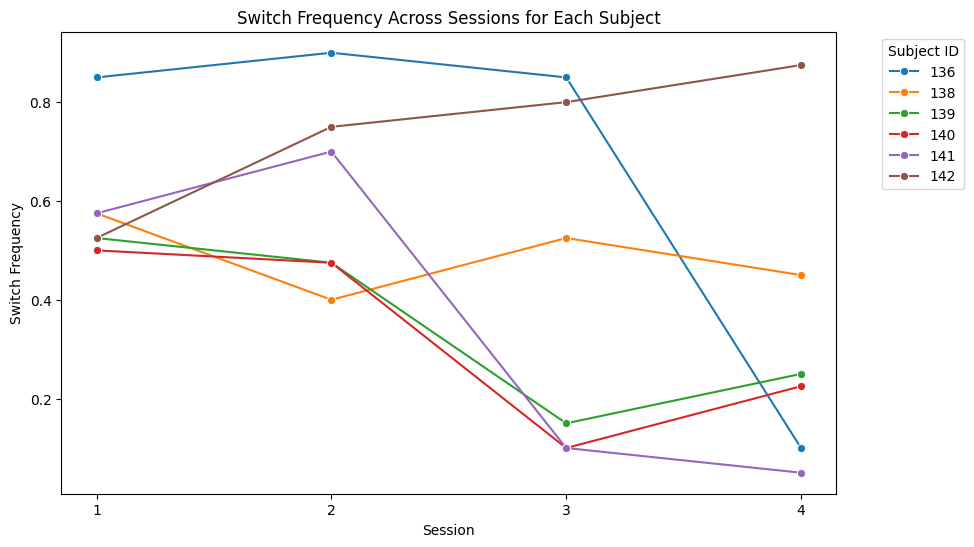

In [28]:
# Line plot of switch frequency across sessions for each subject
plt.figure(figsize=(10, 6))
sns.lineplot(x='session', y='switch_frequency', hue='subject_id', data=switch_df, marker='o')
plt.title('Switch Frequency Across Sessions for Each Subject')
plt.xlabel('Session')
plt.ylabel('Switch Frequency')
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [31]:
switch_df

,subject_id,session,trials,switches,switch_frequency
0,136,1,40,34,0.850
1,136,2,40,36,0.900
2,136,3,40,34,0.850
3,136,4,40,4,0.100
4,138,1,40,23,0.575
5,138,2,40,16,0.400
6,138,3,40,21,0.525
7,138,4,40,18,0.450
8,139,1,40,21,0.525
9,139,2,40,19,0.475
